In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

In [4]:
Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
LON2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")    


(7, 21, 24, 10, 12, 10)


In [5]:
# for first 6 altitude injections

directory1 = '/n/home12/hongwei/Paper_2/Plot_python/Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line1 in Lines1:
                a1 = line1.split(',')
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON1[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT1[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

/n/home12/hongwei/Paper_2/Plot_python/Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:02<00:00,  5.23it/s]


In [6]:
# for 21-km injection

directory2 = '/n/home12/hongwei/Paper_2/Plot_python/21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line2 in Lines2:
                a2 = line2.split(',')
                data.append(     float(a2[0]))
                data_N.append(   float(a2[1]))
                data_S.append(   float(a2[2]))
                Longitude.append(float(a2[3]))
                Latitude.append( float(a2[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON2[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT2[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

  8%|▊         | 1/12 [00:00<00:01,  7.22it/s]

/n/home12/hongwei/Paper_2/Plot_python/21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:01<00:00,  9.12it/s]


In [9]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
LON[0:4,:,:,:,:,:] = LON1[0:4,:,:,:,:,:]
LAT[0:4,:,:,:,:,:] = LAT1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
LON[4,:,:,:,:,:] = LON2[0,:,:,:,:,:]
LAT[4,:,:,:,:,:] = LAT2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
LON[5:7,:,:,:,:,:] = LON1[4:6,:,:,:,:,:]
LAT[5:7,:,:,:,:,:] = LAT1[4:6,:,:,:,:,:]

## clustering lifetime based on QBO west/east phases

### QBO west:
2002.4-2002.11 (Moderate El Nino)

2004.5-2004.11 (Weak El Nino)

2006.6-2006.11 (Weak El Nino)

2008.6-2008.9 (Weak La Nina)

### QBO east:
2001.6-2001.8 (Weak La Nina)

2003.7-2003.10 (Moderate El Nino)

2005.7-2005.11 (Weak La Nina)

2007.7-2007.11 (Strong La Nina)


In [10]:
# lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_west1 = np.mean( lifetime[3,:,:,:,3:10,2], axis=(2,3))
lifetime_west2 = np.mean( lifetime[3,:,:,:,4:10,4], axis=(2,3))
lifetime_west3 = np.mean( lifetime[3,:,:,:,5:10,6], axis=(2,3))
lifetime_west4 = np.mean( lifetime[3,:,:,:,5:8,8], axis=(2,3))

lifetime_west_mean = (lifetime_west1 +lifetime_west2 +lifetime_west3 +lifetime_west4)/4

lifetime_east1 = np.mean( lifetime[3,:,:,:,5:7,1], axis=(2,3))
lifetime_east2 = np.mean( lifetime[3,:,:,:,6:9,3], axis=(2,3))
lifetime_east3 = np.mean( lifetime[3,:,:,:,6:10,5], axis=(2,3))
lifetime_east4 = np.mean( lifetime[3,:,:,:,6:10,7], axis=(2,3))

lifetime_east_mean = (lifetime_east1 +lifetime_east2 +lifetime_east3 +lifetime_east4)/4

print(lifetime_east_mean.shape)

print("Mean lifetime in QBO west phase:")
print(np.mean(lifetime_west1), np.mean(lifetime_west2), np.mean(lifetime_west3), np.mean(lifetime_west4))
print('=== === ===')
print("Mean lifetime in QBO east phase:")
print(np.mean(lifetime_east1), np.mean(lifetime_east2), np.mean(lifetime_east3), np.mean(lifetime_east4))

(21, 24)
Mean lifetime in QBO west phase:
735.6327097505667 760.4069775132276 773.394126984127 777.5213624338624
=== === ===
Mean lifetime in QBO east phase:
772.192261904762 720.3273148148148 733.0769841269841 758.6677083333334


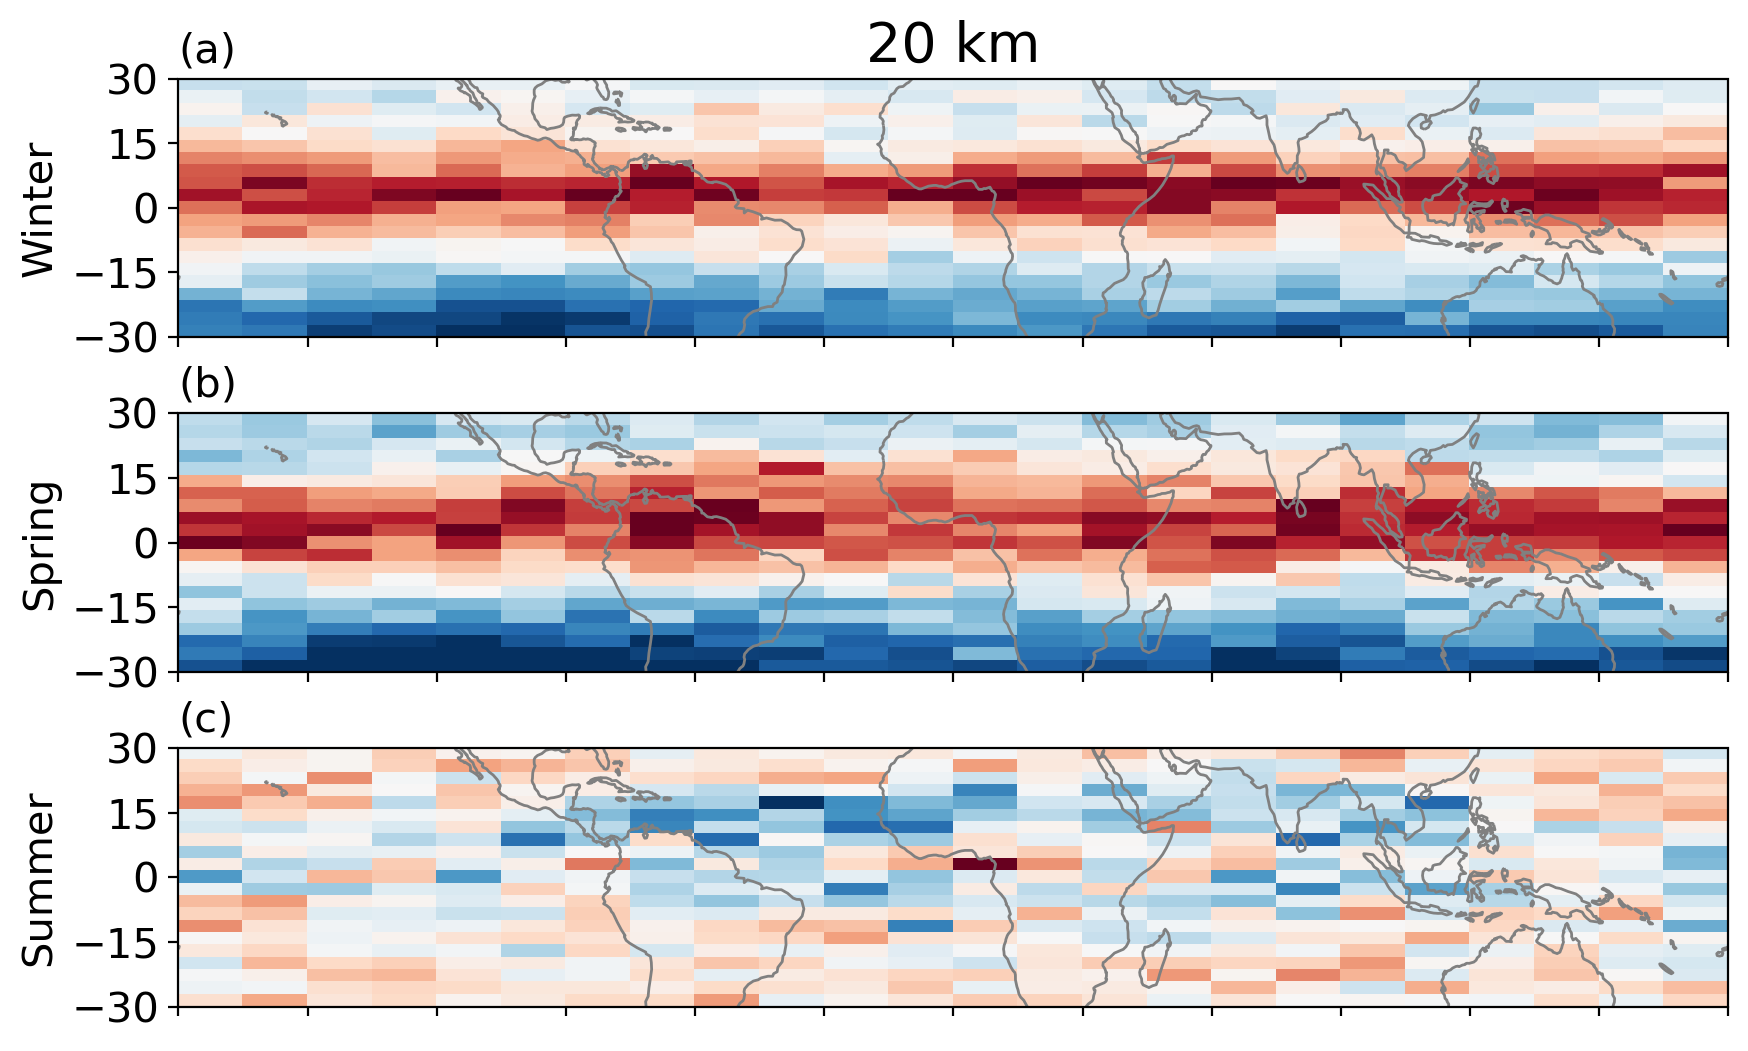

In [11]:
# Height   = [16,  18, 19, 20, 22, 24] # km


fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()


Day_min = 400/365.25
Day_max = 1100/365.25
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_west_mean/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("20 km", fontsize=20)
ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_east_mean/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("Spring", fontsize=15)
ax2.set_title("(b)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow((lifetime_west_mean-lifetime_east_mean)/365.25, \
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Summer", fontsize=15)
ax3.set_title("(c)", loc='left', fontsize=15)


plt.show()

## select the same month for west/east phase, to avoid seasonal influence

### QBO west:
2002.7-2002.8 (Moderate El Nino)

2004.7-2004.8 (Weak El Nino)

2006.7-2006.8 (Weak El Nino)

2008.7-2008.8 (Weak La Nina)

### QBO east:
2001.7-2001.8 (Weak La Nina)

2003.7-2003.8 (Moderate El Nino)

2005.7-2005.8 (Weak La Nina)

2007.7-2007.8 (Strong La Nina)

In [12]:
# lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_west1 = np.mean( lifetime[3,:,:,:,6:7,2], axis=(2,3))
lifetime_west2 = np.mean( lifetime[3,:,:,:,6:7,4], axis=(2,3))
lifetime_west3 = np.mean( lifetime[3,:,:,:,6:7,6], axis=(2,3))
lifetime_west4 = np.mean( lifetime[3,:,:,:,6:7,8], axis=(2,3))

lifetime_west_mean = (lifetime_west1 +lifetime_west2 +lifetime_west3 +lifetime_west4)/4

lifetime_east1 = np.mean( lifetime[3,:,:,:,6:7,1], axis=(2,3))
lifetime_east2 = np.mean( lifetime[3,:,:,:,6:7,3], axis=(2,3))
lifetime_east3 = np.mean( lifetime[3,:,:,:,6:7,5], axis=(2,3))
lifetime_east4 = np.mean( lifetime[3,:,:,:,6:7,7], axis=(2,3))

lifetime_east_mean = (lifetime_east1 +lifetime_east2 +lifetime_east3 +lifetime_east4)/4

print(lifetime_east_mean.shape)

print("Mean lifetime in QBO west phase:")
print(np.mean(lifetime_west1), np.mean(lifetime_west2), np.mean(lifetime_west3), np.mean(lifetime_west4))
print('=== === ===')
print("Mean lifetime in QBO east phase:")
print(np.mean(lifetime_east1), np.mean(lifetime_east2), np.mean(lifetime_east3), np.mean(lifetime_east4))

(21, 24)
Mean lifetime in QBO west phase:
749.7363095238095 782.0156746031746 775.1956349206349 784.4244047619048
=== === ===
Mean lifetime in QBO east phase:
761.6902777777779 744.510119047619 758.2920634920636 778.7950396825396


In [13]:
# check the extreme case

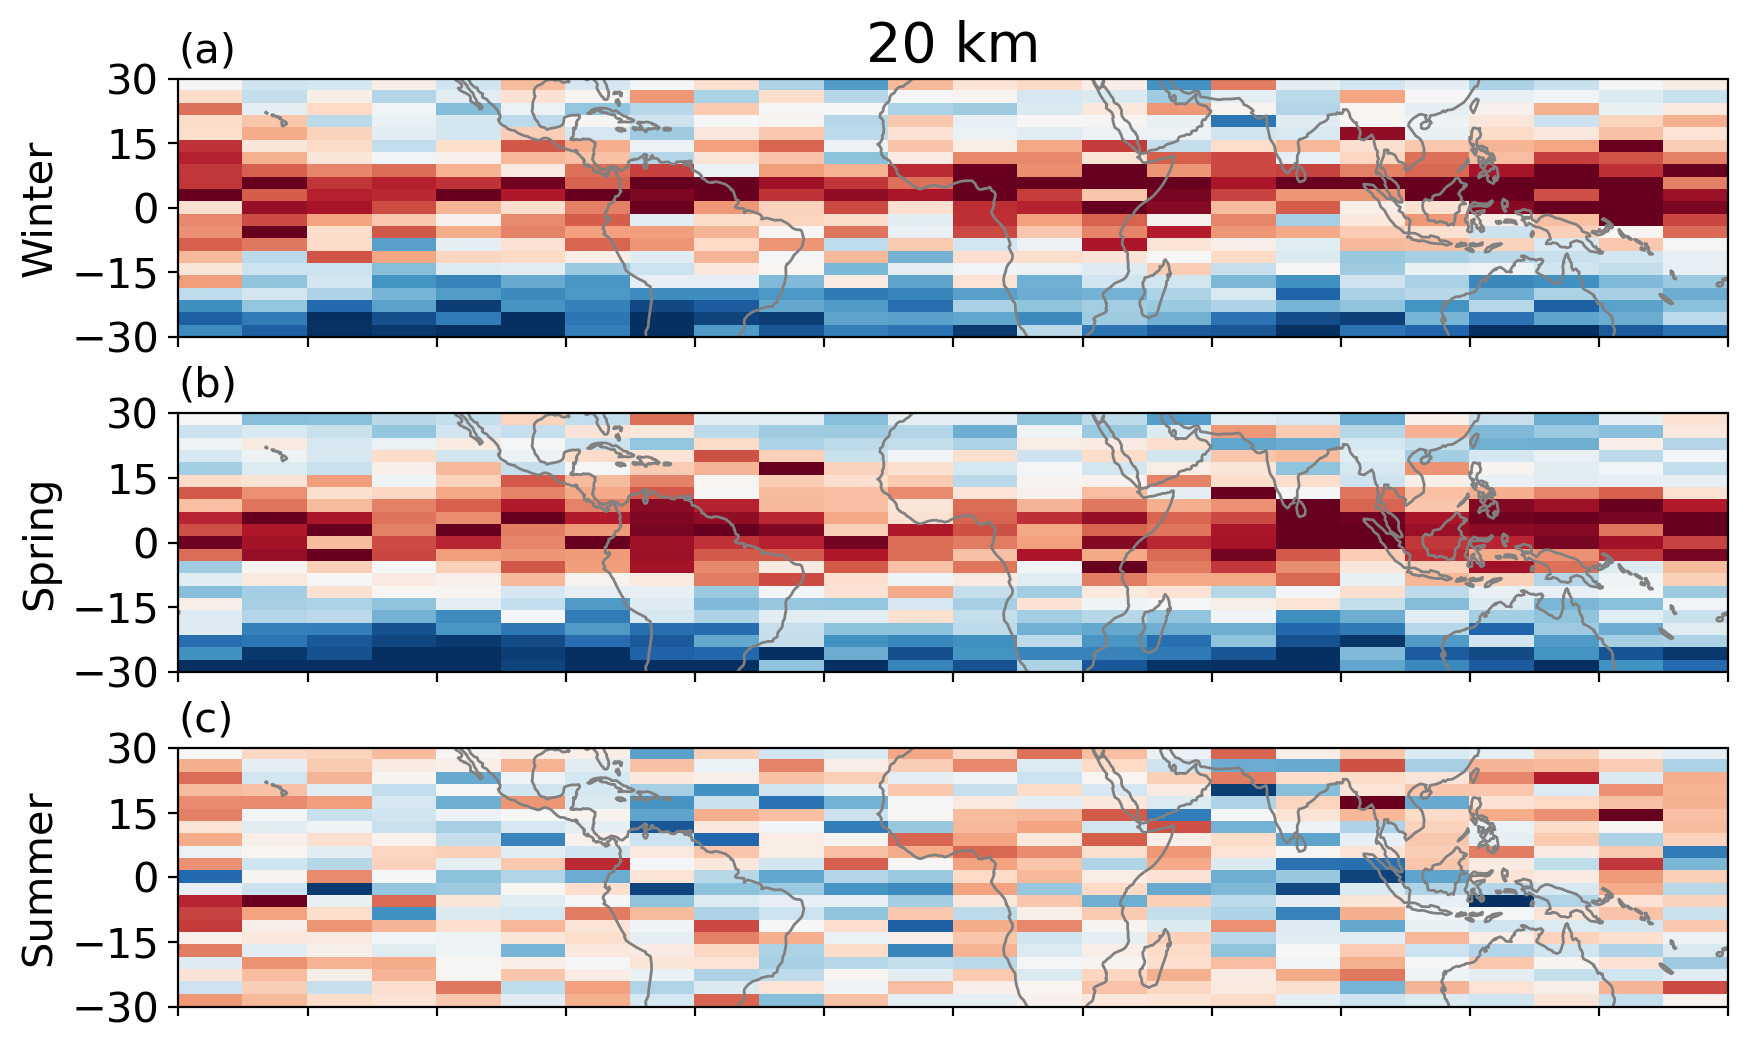

In [14]:
# Height   = [16,  18, 19, 20, 22, 24] # km


fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()


Day_min = 400/365.25
Day_max = 1100/365.25
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_west_mean/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("20 km", fontsize=20)
ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_east_mean/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("Spring", fontsize=15)
ax2.set_title("(b)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow((lifetime_west_mean-lifetime_east_mean)/365.25, \
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Summer", fontsize=15)
ax3.set_title("(c)", loc='left', fontsize=15)


plt.show()

## Taking ENSO into consideration

making sure the comparison is under the same ENSO year


### Moderate El Nino

QBO west: 2002.7-2002.8

QBO east: 2003.7-2003.8

In [15]:
# lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_west1 = np.mean( lifetime[3,:,:,:,6:7,2], axis=(2,3))

lifetime_east1 = np.mean( lifetime[3,:,:,:,6:7,3], axis=(2,3))


print("Mean lifetime in QBO west phase:")
print(np.mean(lifetime_west1))
print('=== === ===')
print("Mean lifetime in QBO east phase:")
print(np.mean(lifetime_east1))

Mean lifetime in QBO west phase:
749.7363095238095
=== === ===
Mean lifetime in QBO east phase:
744.510119047619


### Weak La Nina:
QBO west: 2008.7-2008.8
QBO east: 2001.7-2001.8; 2005.7-2005.8


In [16]:
# lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_west1 = np.mean( lifetime[3,:,:,:,6:7,8], axis=(2,3))

lifetime_east1 = np.mean( lifetime[3,:,:,:,6:7,1], axis=(2,3))
lifetime_east2 = np.mean( lifetime[3,:,:,:,6:7,5], axis=(2,3))


print("Mean lifetime in QBO west phase:")
print(np.mean(lifetime_west1))
print('=== === ===')
print("Mean lifetime in QBO east phase:")
print(np.mean(lifetime_east1), np.mean(lifetime_east2))

Mean lifetime in QBO west phase:
784.4244047619048
=== === ===
Mean lifetime in QBO east phase:
761.6902777777779 758.2920634920636


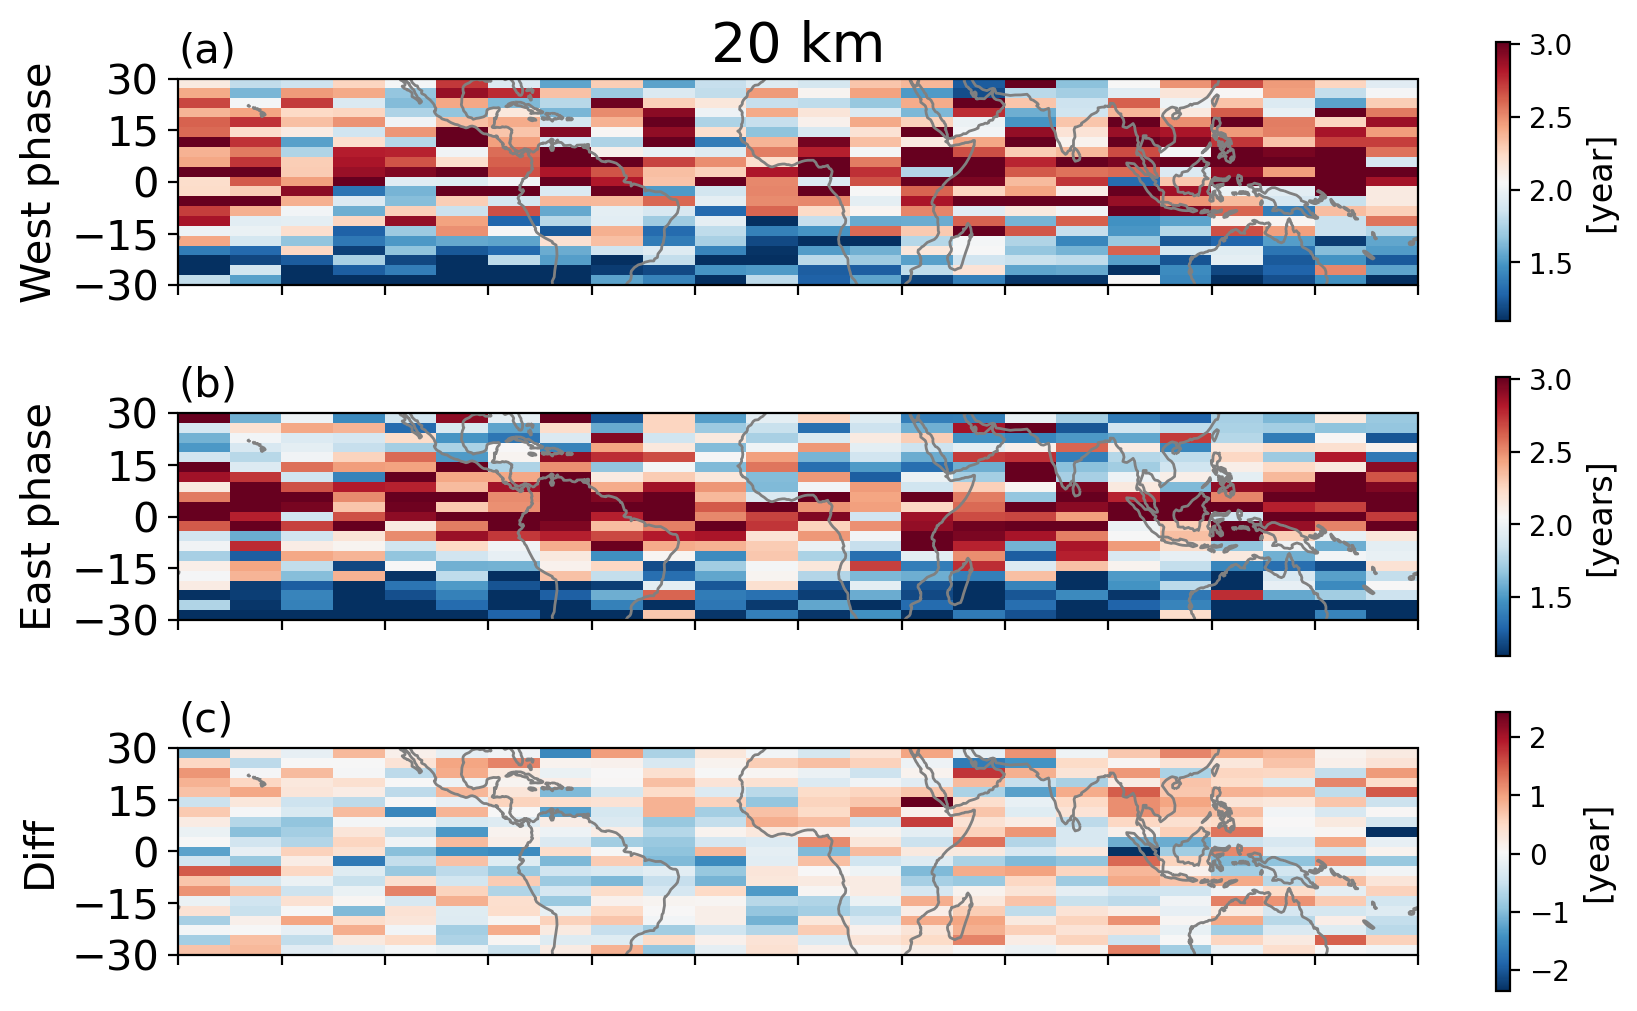

In [19]:
# Height   = [16,  18, 19, 20, 22, 24] # km


fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()


Day_min = 400/365.25
Day_max = 1100/365.25
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_west1/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

    
cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("20 km", fontsize=20)
ax1.set_ylabel("West phase", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_east2/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb2 = plt.colorbar(ax2_pixel, ax=ax2)
cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("East phase", fontsize=15)
ax2.set_title("(b)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow((lifetime_west1-lifetime_east2)/365.25, \
            extent = extent, cmap='RdBu_r', interpolation='nearest')

cb3 = plt.colorbar(ax3_pixel, ax=ax3)
cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Diff", fontsize=15)
ax3.set_title("(c)", loc='left', fontsize=15)


plt.show()

# Primary conclusion:

Particles injected in the QBO west phase could have a longer lifetime than injected in QBO east phase

BDC is stronger in east phase